In [ ]:
from algs import *
from data import *
from plot import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

In [ ]:
# create dataframe of example from Introduction to Algorithms
adj_close = [100, 113, 110, 85, 105, 102, 86, 63, 81, 101, 94, 106, 101, 79, 94, 90, 97]
def toy_df_from_close(close):
    data = pd.DataFrame({'adj_close':close})
    data = add_changes(data).dropna().reset_index()
    return data
data = toy_df_from_close(adj_close)

In [ ]:
a = find_maximum_subarray(data.change, return_type=tuple)
b = find_maximum_subarray_brute_force(data.change)
c = find_maximum_subarray_kadane(data.change)
evaluate_correctness(data.change)

In [ ]:
n_points = 10
ns = np.logspace(1, 3, n_points).astype(int)

In [ ]:
a_times, b_times, c_times = [], [], []
for n in ns:
    changes = toy_df_from_close(np.random.rand(n)).change
    
    # n
    start = time.time()
    a = find_maximum_subarray_kadane(changes)
    a_time = time.time() - start
    
    # nlgn
    start = time.time()
    b = find_maximum_subarray(changes, return_type=tuple)
    b_time = time.time() - start
    
    # n^2
    start = time.time()
    c = find_maximum_subarray_brute_force(changes)
    c_time = time.time() - start
    
    a_times.append(a_time)
    b_times.append(b_time)
    c_times.append(c_time)
    print(n, a_time, b_time, c_time)

In [ ]:
np.save('a_times.npy', np.array(a_times))
np.save('b_times.npy', np.array(b_times))
np.save('c_times.npy', np.array(c_times))

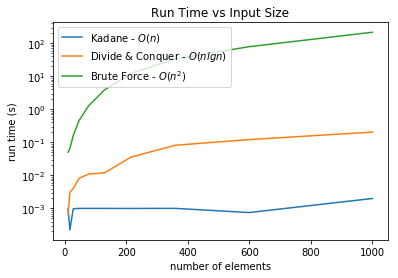

In [62]:
plt.semilogy(ns, a_times, ns, b_times, ns, c_times)
plt.title('Run Time vs Input Size')
plt.xlabel('number of elements')
plt.ylabel('run time (s)')
plt.legend(['Kadane - $O(n)$', 'Divide & Conquer - $O(nlgn)$', 'Brute Force - $O(n^2)$'], loc=2)
plt.savefig('runtime.svg')
plt.show()